In [1]:
import pandas as pd

In [2]:
shop= pd.read_csv("C:/Users/shukl/Desktop/Aayush documents/PSHE/1.Statskew/online_shoppers_intention.csv")

In [3]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shop.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
shop['Month'] = label_encoder.fit_transform(shop['Month'])
shop['VisitorType'] = label_encoder.fit_transform(shop['VisitorType'])
shop['Weekend'] = shop['Weekend'].astype(int)

In [7]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
X = shop.drop('Revenue',axis=1)
Y = shop['Revenue']

In [9]:
X= X.astype(float)
X.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                      float64
OperatingSystems           float64
Browser                    float64
Region                     float64
TrafficType                float64
VisitorType                float64
Weekend                    float64
dtype: object

In [10]:
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.5, random_state=42)

In [11]:
shopTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
shopTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [12]:
shopTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
Y_val_pred = shopTree.predict(X_val)
Y_val_pred

array([False,  True,  True, ..., False, False, False])

In [14]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [15]:
val_accuracy = accuracy_score(Y_val, Y_val_pred)
print("Validation Set Accuracy:", val_accuracy)

Validation Set Accuracy: 0.8950784207679827


In [16]:
Y_test_pred = shopTree.predict(X_test)
Y_test_pred

array([ True, False, False, ..., False, False, False])

In [17]:
test_accuracy = accuracy_score(Y_test, Y_test_pred)
print("Testing Set Accuracy:", test_accuracy)

Testing Set Accuracy: 0.8945945945945946


In [18]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

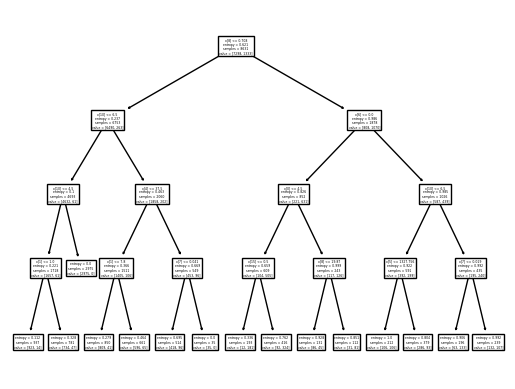

In [19]:
tree.plot_tree(shopTree)
plt.show()

In [20]:
import pickle

In [21]:
filename = 'final_model.pickle'
pickle.dump(shopTree, open(filename, 'wb'))

In [22]:
from flask import Flask, render_template,request
from sklearn.preprocessing import StandardScaler

In [23]:
app = Flask(__name__, template_folder= 'template')
model = pickle.load(open('final_model.pickle','rb'))
@app.route("/",methods = ["GET"])
def Home_page():
    return render_template("index.html")

In [24]:
standard_to = StandardScaler()

In [25]:
@app.route("/predict",methods=["POST"])
def prediction_page():
    if request.method == "POST":
        LSTAT = float(request.form["LSTAT"])
        INDUS = float(request.form["INDUS"])
        NOX = float(request.form["NOX"])
        PTRATIO = float(request.form["PTRATIO"])
        RM = float(request.form["RM"])
        TAX = float(request.form["TAX"])
        DIS = float(request.form["DIS"])
        AGE = float(request.form["AGE"])

        prediction = model.predict([[LSTAT, INDUS, NOX, PTRATIO, RM, TAX, DIS, AGE]])
        return render_template('result.html', result = prediction)
    
    else:
        return render_template('index.html')

In [26]:
if __name__=="__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3513: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
